In [1]:
#install.packages("ggplot2")

also installing the dependencies ‘colorspace’, ‘Rcpp’, ‘RColorBrewer’, ‘dichromat’, ‘munsell’, ‘labeling’, ‘assertthat’, ‘gtable’, ‘plyr’, ‘reshape2’, ‘scales’, ‘tibble’, ‘lazyeval’




The downloaded binary packages are in
	/var/folders/wb/3nvzzj094zq32ndq8d7rhjqm0000gn/T//Rtmp1mIUbG/downloaded_packages


In [29]:
library(ggplot2)

P <- function(..., sep = "", collapse = NULL) {
    paste(..., sep = sep, collapse = collapse)
}

In [11]:
# read csv
dataDir <- "../data/"
body.data <- read.csv(P(dataDir, "body_sample.csv"), header = T, stringsAsFactors = F)
head(body.data)

id gender height weight
1 1  M      157.67 64.82 
2 2  M      178.76 72.38 
3 3  M      161.95 64.52 
4 4  M      162.26 63.35 
5 5  M      167.95 68.76 
6 6  M      165.59 66.40

In [12]:
# read tsv
dataDir <- "../data/"
body.data <- read.table(P(dataDir, "body_sample.tsv"), header = T, stringsAsFactors = F)
head(body.data)

id gender height weight
1 1  M      157.67 64.82 
2 2  M      178.76 72.38 
3 3  M      161.95 64.52 
4 4  M      162.26 63.35 
5 5  M      167.95 68.76 
6 6  M      165.59 66.40

In [26]:
body.data[order(body.data$height), ]

id  gender height weight
324 324 F      135.51 33.07 
270 270 F      136.59 36.07 
283 283 F      136.85 31.44 
210 210 F      137.89 40.85 
282 282 F      140.53 41.28 
247 247 F      141.10 35.02 
391 391 F      141.49 41.07 
325 325 F      141.62 39.77 
243 243 F      142.09 43.59 
258 258 F      143.00 38.47 
252 252 F      143.17 39.01 
267 267 F      143.25 45.40 
222 222 F      143.69 45.75 
228 228 F      143.75 43.67 
365 365 F      143.79 43.30 
287 287 F      144.07 42.68 
245 245 F      144.47 44.17 
238 238 F      145.02 40.22 
91   91 M      145.10 50.49 
261 261 F      145.48 47.71 
394 394 F      145.48 45.13 
143 143 M      145.63 55.43 
248 248 F      145.80 45.37 
120 120 M      145.97 55.62 
54   54 M      146.00 50.69 
400 400 F      146.28 42.26 
189 189 M      146.48 56.07 
202 202 F      146.67 43.98 
209 209 F      146.92 43.73 
284 284 F      147.27 41.88 
⋮   ⋮   ⋮      ⋮      ⋮     
94   94 M      171.05 70.21 
114 114 M      171.11 77.74 
60   60 M      171.29 70.13 
16   16 M      171.33 76.02 
127 127 M      171.40 68.27 
8     8 M      171.78 67.76 
61   61 M      171.81 68.40 
71   71 M      171.86 77.23 
129 129 M      171.86 76.90 
162 162 M      171.95 69.59 
98   98 M      172.19 68.83 
198 198 M      172.24 69.80 
134 134 M      172.33 66.38 
83   83 M      172.43 69.58 
135 135 M      172.57 77.34 
20   20 M      172.97 70.98 
329 329 F      173.76 66.17 
188 188 M      173.79 75.48 
168 168 M      174.07 72.92 
110 110 M      174.10 67.76 
191 191 M      175.74 75.60 
184 184 M      176.07 74.48 
39   39 M      176.24 73.56 
45   45 M      176.34 75.02 
155 155 M      177.06 74.68 
117 117 M      177.17 78.99 
2     2 M      178.76 72.38 
113 113 M      178.80 69.24 
125 125 M      179.17 78.56 
77   77 M      181.53 77.60

In [27]:
summary(body.data)

       id           gender              height          weight     
 Min.   :  1.0   Length:400         Min.   :135.5   Min.   :31.44  
 1st Qu.:100.8   Class :character   1st Qu.:152.4   1st Qu.:50.93  
 Median :200.5   Mode  :character   Median :158.2   Median :57.78  
 Mean   :200.5                      Mean   :158.4   Mean   :58.16  
 3rd Qu.:300.2                      3rd Qu.:163.9   3rd Qu.:65.53  
 Max.   :400.0                      Max.   :181.5   Max.   :78.99  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


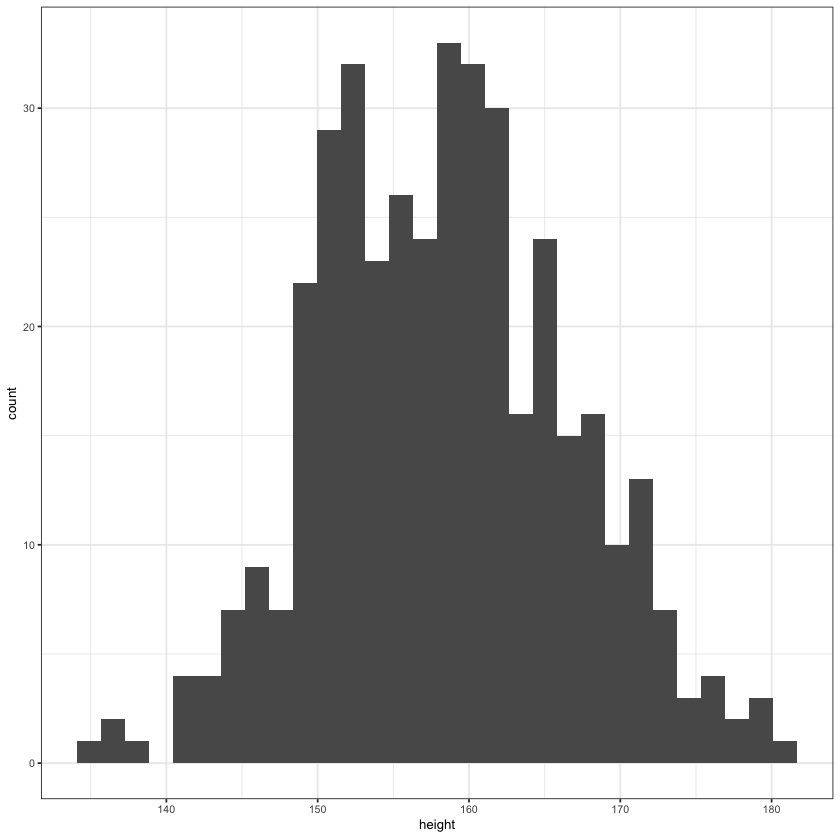

In [34]:
ggplot(body.data, aes(x=height)) + 
geom_histogram() + 
theme_bw(8) +
ylab("count")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


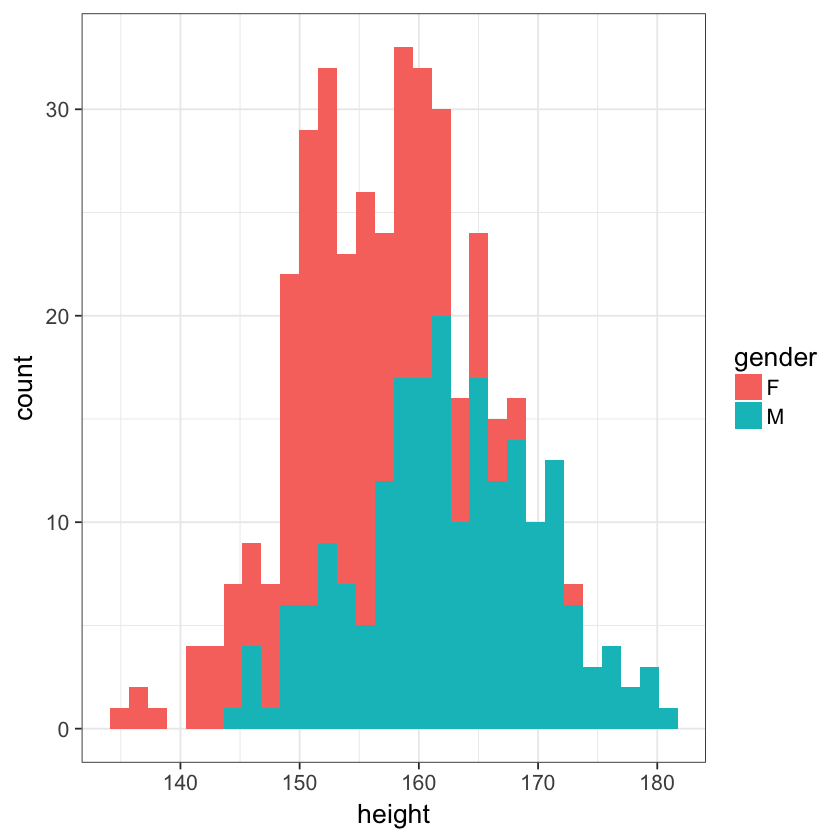

In [36]:
ggplot(body.data, aes(height, fill=gender)) +
geom_histogram() + 
theme_bw(16) +
ylab("count")

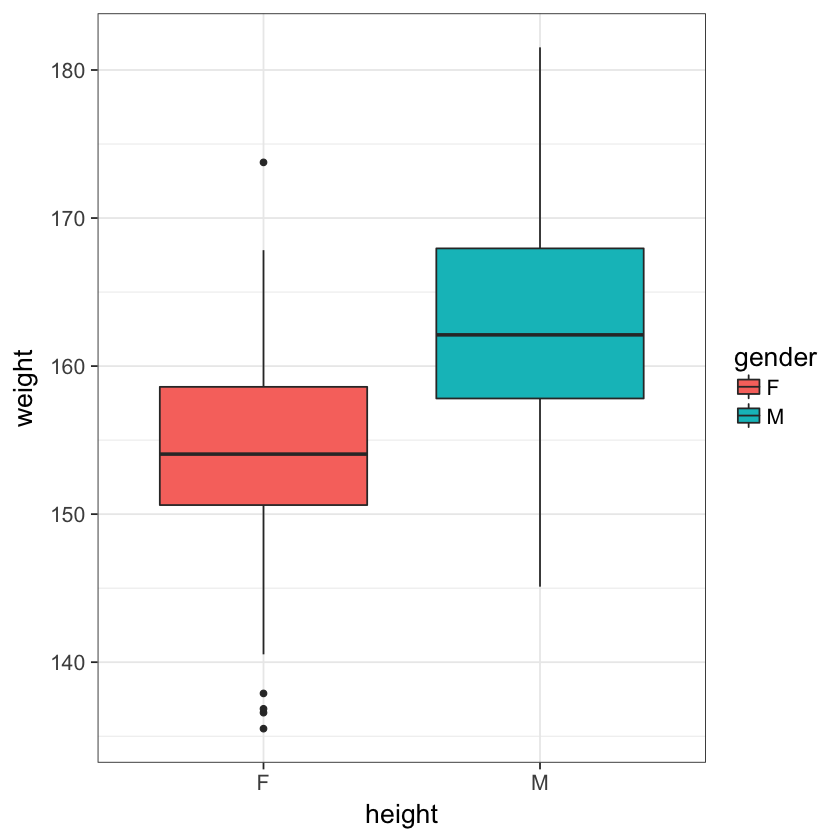

In [37]:
# 身長データの箱ひげ図
ggplot(body.data, aes(x=gender, y=height, fill=gender)) + 
geom_boxplot() + 
theme_bw(16) + 
ylab("weight") + xlab("height")

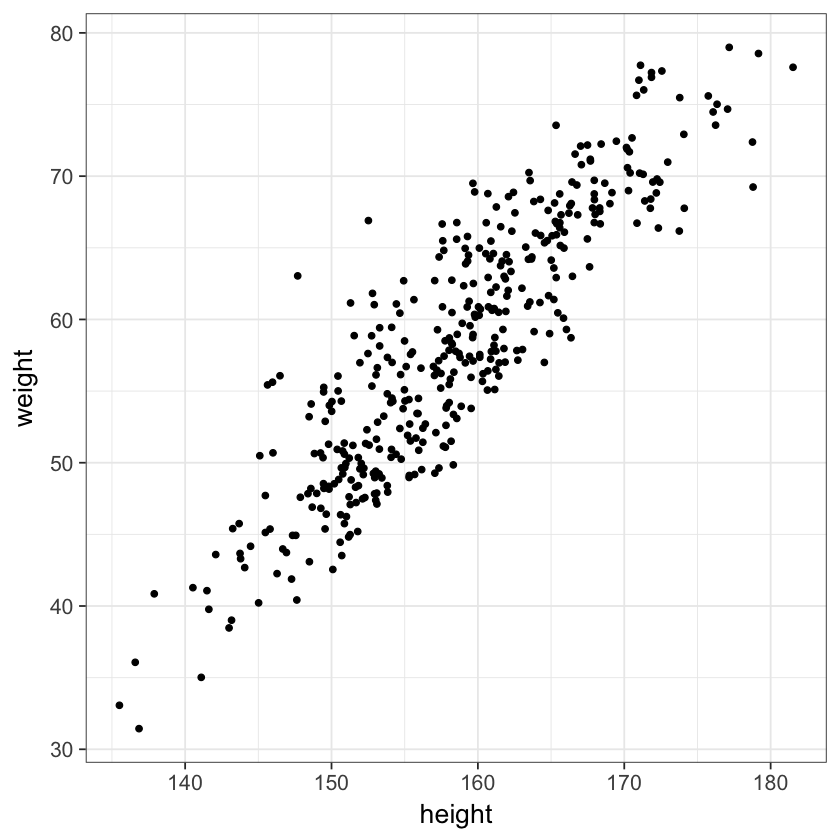

In [43]:
# 身長と体重の散布図

ggplot(body.data, aes(x=height, y=weight)) + 
geom_point() + 
theme_bw(16)

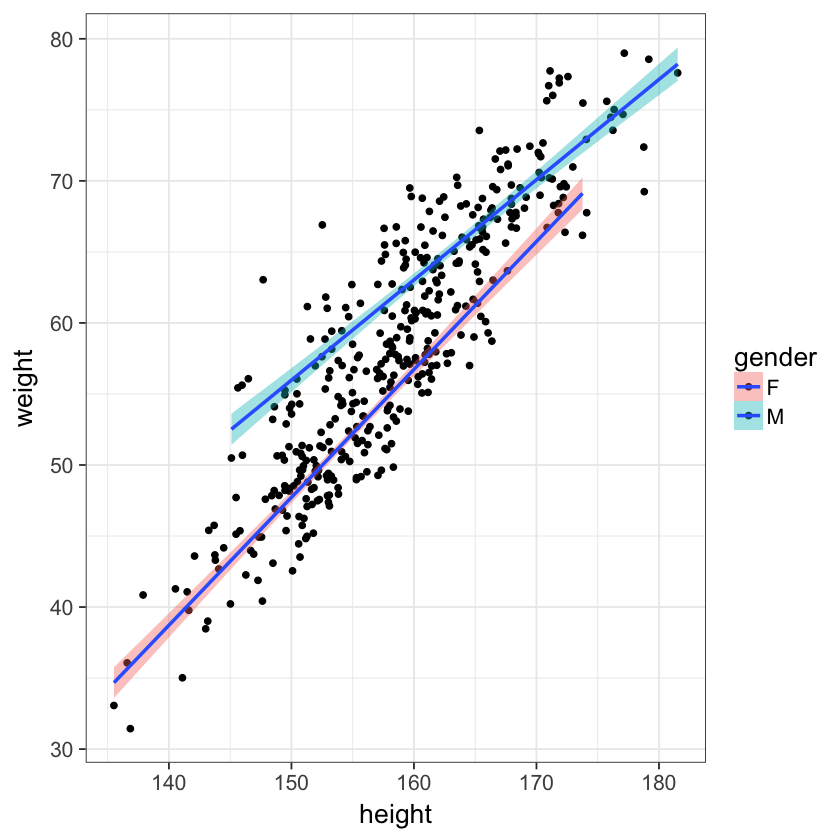

In [44]:
ggplot(body.data, aes(x=height, y=weight, fill=gender)) + 
geom_point() + 
theme_bw(16) + 
geom_smooth(method = "lm")

# 相関係数の算出

In [46]:
#全体
cor(body.data$height, body.data$weight)

[1] 0.8928748

In [47]:
#男性
body.data.m <- body.data[body.data$gender == "M", ]
cor(body.data.m$height, body.data.m$weight)

[1] 0.863457

In [48]:
body.data.f = body.data[body.data$gender=="F",]
cor(body.data.f$height, body.data.f$weight)

[1] 0.9173599